In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# Download Dataset
!kaggle datasets download -d ananthu017/emotion-detection-fer

 87% 57.0M/65.2M [00:00<00:00, 107MB/s]
100% 65.2M/65.2M [00:00<00:00, 109MB/s]


In [4]:
!unzip -q /content/emotion-detection-fer.zip

In [6]:
!mkdir data

In [7]:
import shutil

shutil.move('/content/train', '/content/data')

'/content/data/train'

In [8]:
shutil.move('/content/test', '/content/data')

'/content/data/test'

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [9]:
pip install tensorflow

Sample happy image:


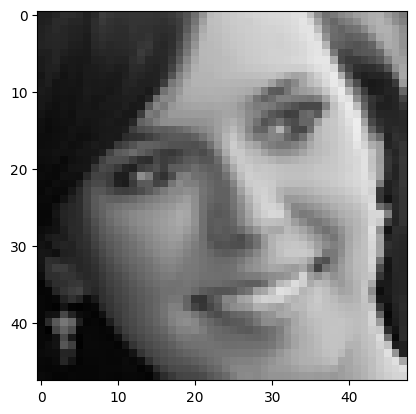


Sample sad image:


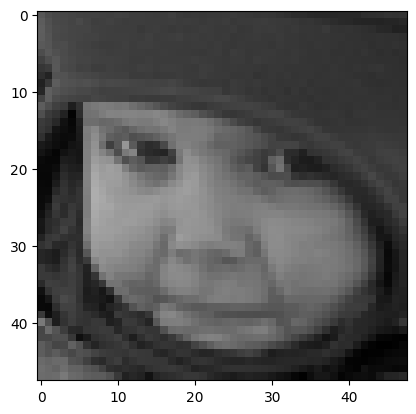

In [10]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "/content/data/train"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (48, 48, 3)
The maximum pixel value used is: 237.0


In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.81:
            print("\nReached 81% accuracy so cancelling training!")
            self.model.stop_training = True

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def image_generator():
    train_datagen = ImageDataGenerator(rescale=1./255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(48, 48),
                                                        batch_size=10,
                                                        class_mode='categorical')

    return train_generator


In [14]:
# Save generator in a variable
gen = image_generator()

Found 28709 images belonging to 7 classes.


In [22]:
from tensorflow.keras import optimizers, losses, layers

# Instantiate the callback
callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D(2, 2),
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # Flatten the output for the fully connected layers
    layers.Flatten(),
    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),
    # Output Layer
    layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])


# Train the model
history = model.fit(x=gen,
                    epochs=15,
                    callbacks=[callbacks])

Epoch 1/15
2871/2871 [==============================] - 22s 7ms/step - loss: 1.6311 - accuracy: 0.3503
Epoch 2/15
2871/2871 [==============================] - 25s 9ms/step - loss: 1.3556 - accuracy: 0.4792
Epoch 3/15
2871/2871 [==============================] - 22s 8ms/step - loss: 1.2266 - accuracy: 0.5310
Epoch 4/15
2871/2871 [==============================] - 20s 7ms/step - loss: 1.1251 - accuracy: 0.5752
Epoch 5/15
2871/2871 [==============================] - 22s 8ms/step - loss: 1.0377 - accuracy: 0.6099
Epoch 6/15
2871/2871 [==============================] - 22s 8ms/step - loss: 0.9468 - accuracy: 0.6393
Epoch 7/15
2871/2871 [==============================] - 21s 7ms/step - loss: 0.8528 - accuracy: 0.6786
Epoch 8/15
2871/2871 [==============================] - 21s 7ms/step - loss: 0.7722 - accuracy: 0.7125
Epoch 9/15
2871/2871 [==============================] - 21s 7ms/step - loss: 0.6830 - accuracy: 0.7488
Epoch 10/15
2871/2871 [==============================] - 21s 7ms/step - l

In [23]:
print(f"Your model reached the desired accuracy after {len(history.epoch)} epochs")

Your model reached the desired accuracy after 12 epochs


In [24]:
if not "accuracy" in history.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

The metric was correctly defined.


In [31]:
class_names = gen.class_indices
class_names

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

Saving stickers-sad-face-crying.jpg to stickers-sad-face-crying (3).jpg
Saving vector-emoji-angry-face-cute-600nw-1927365128.webp to vector-emoji-angry-face-cute-600nw-1927365128.webp
Saving happiness-1.jpg to happiness-1 (6).jpg
1/1 [==============================] - 0s 18ms/step
Predicted class: happy
Class probabilities: [[3.6289913e-03 2.7132539e-13 1.1522020e-03 7.7704513e-01 1.8462232e-01
  3.3551313e-02 1.8974951e-08]]


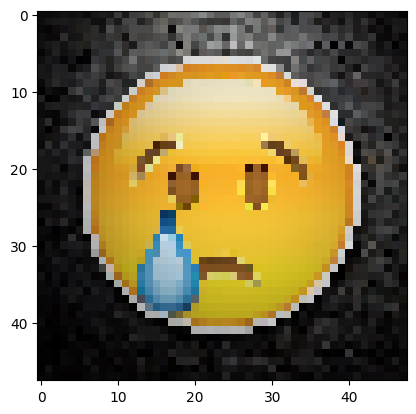

1/1 [==============================] - 0s 17ms/step
Predicted class: surprised
Class probabilities: [[5.5075269e-03 6.9853486e-14 1.2627726e-04 3.3686107e-03 1.1024653e-03
  1.6553162e-04 9.8972964e-01]]


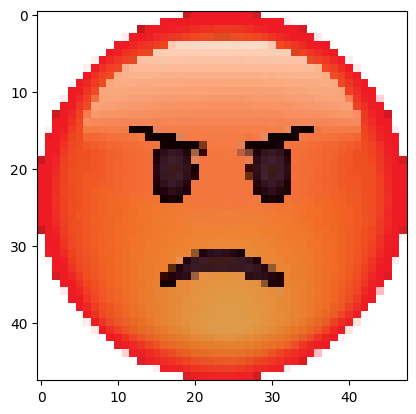

1/1 [==============================] - 0s 18ms/step
Predicted class: happy
Class probabilities: [[1.3043499e-12 0.0000000e+00 6.8598228e-16 1.0000000e+00 1.9879936e-08
  3.4681789e-11 1.5350723e-15]]


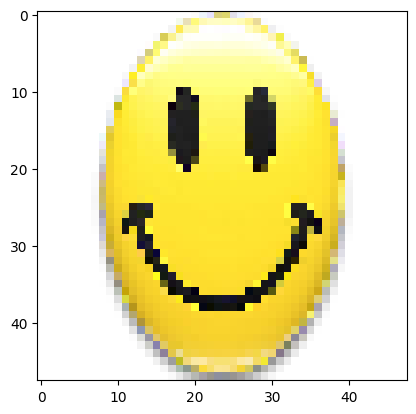

In [40]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(48, 48))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)

  # Get the predicted class index
  predicted_class_index = np.argmax(predictions)

  # Get the predicted class label from the 'gen' variable
  predicted_class = list(class_names.keys())[list(class_names.values()).index(predicted_class_index)]

  # Print the prediction
  print("Predicted class:", predicted_class)
  print("Class probabilities:", predictions)

  plt.imshow(img)
  plt.show()